In [1]:
import Tasmanian as ts
import numpy as np
import sys
sys.path.append("..")
from src.py.option import AsianOption


In [2]:
def make_grid(dim, exactness, lb, rb, rule):
    """Creates a sparse grid according to given rules and boundaries.

    Args:
        dim (int): Input Dimension.
        exactness (int): Exactness of the integration.
        lb (array-like): Left boundary. Shape (dim) is recommended.
        rb (array-like): Right boundary. Shape (dim) is recommended.
        rule (str):  One of the local polynomial rules in TASMANIAN docs.
            Defaults to "localp".

    Returns:
        TasmanianSparseGrid: SparseGrid object.
    """
    grid = ts.makeGlobalGrid(
        dim, 1, exactness, "level", rule
    )
    grid.setDomainTransform(np.vstack([lb, rb]).T)
    return grid

aop = AsianOption(d=2)
# iNumInputs = 4
# iNumOutputs = 1
# grid = ts.SparseGrid()
# grid.makeLocalPolynomialGrid(iNumInputs, iNumOutputs, 4, iOrder=1, sRule="localp")


In [3]:
s_0_l=80.0
s_0_r=120.0
sigma_l=0.1
sigma_r=0.2
mu_l=0.02
mu_r=0.05
T_l=0.9
T_r=1.0

def phi(x,sigma,mu,T, axis=1):
    payoffcoarse=np.exp(-mu * T)* np.maximum(x - 100, 0.)
    return payoffcoarse

transform = np.array(
    [[s_0_l, s_0_r],
    [sigma_l, sigma_r],
    [mu_l, mu_r],
    [T_l, T_r]
    ]
)

In [83]:
dim, exactness = 2, 2
lb, rb =  s_0_l * np.ones(dim), s_0_r * np.ones(dim)
grid = make_grid(dim, exactness, lb, rb, "gauss-patterson")
points = grid.getPoints()


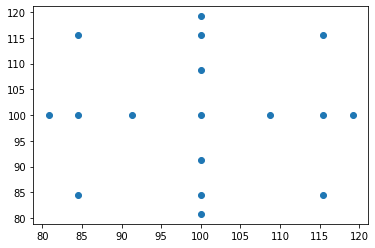

In [84]:
import matplotlib.pyplot as plt

plt.scatter(points[:, 0], points[:, 1])
plt.show()


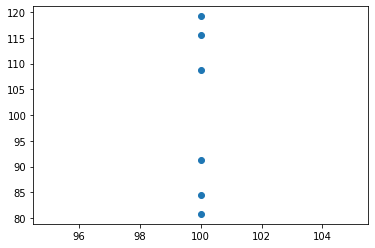

In [90]:
k1, k2 = 1, 7
plt.scatter(points[k1:k2, 0], points[k1:k2, 1])
plt.show()

## Slice Arrays for smoothing

In [115]:
ar = points[points[:, -1].argsort()]
arr = ar[:, -1]
n = arr.strides[0]
maxidx = np.lib.stride_tricks.as_strided(arr, \
    shape=(ar.size-3+1,3), strides=(n,n)).argmax(1)

In [128]:
def cumargmax(a):
    m = np.maximum.accumulate(a)
    x = np.repeat(np.arange(a.shape[0])[:, None], a.shape[1], axis=1)
    x[1:] *= m[:-1] < m[1:]
    np.maximum.accumulate(x, axis=0, out=x)
    return x

In [131]:
cumargmax(ar)

(array([[ 0,  0],
        [ 0,  1],
        [ 0,  1],
        [ 3,  1],
        [ 3,  4],
        [ 3,  5],
        [ 3,  5],
        [ 3,  5],
        [ 3,  5],
        [ 3,  5],
        [ 3,  5],
        [11,  5],
        [11, 12],
        [11, 13],
        [11, 13],
        [11, 13],
        [11, 16]]),
 array([[100.        ,  80.79017463],
        [ 84.50806662,  84.50806662],
        [100.        ,  84.50806662],
        [115.49193338,  84.50806662],
        [100.        ,  91.31512501],
        [ 91.31512501, 100.        ],
        [ 80.79017463, 100.        ],
        [115.49193338, 100.        ],
        [100.        , 100.        ],
        [ 84.50806662, 100.        ],
        [108.68487499, 100.        ],
        [119.20982537, 100.        ],
        [100.        , 108.68487499],
        [ 84.50806662, 115.49193338],
        [115.49193338, 115.49193338],
        [100.        , 115.49193338],
        [100.        , 119.20982537]]))